In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

df_less = pd.read_csv('data_less_0.5.csv')
df_over = pd.read_csv("data_over_0.5.csv")
df = pd.read_csv("final_withTemplates_0.8.csv")
df8 = pd.read_csv("ID_numcontacts_8.csv")
dfn = pd.read_csv("Neff.csv")
dfP = pd.read_csv("Prediction_set.csv")

#print(df_over)
fig, ax = plt.subplots()
fig, ax3 = plt.subplots()
ax2 = ax.twinx()
ax4 = ax3.twinx()
#df.plot.hist(stacked=True, bins=20);

df2 = df_less.merge(df, how='outer').dropna()
df3 = df_over.merge(df, how='outer').dropna()

df28 = df2.merge(df8, how='outer').dropna()
df38 = df3.merge(df8, how='outer').dropna()

df28n = df28.merge(dfn, how='outer').dropna()
df38n = df38.merge(dfn, how='outer').dropna()

df5 = df28n.append(df38n, ignore_index=True)

#
df5["contact_L"] = df5['Ncont']/df5['Len']
df5["good"] = (df5['tmalign']>0.5)
df5.to_csv("Statistic_d5.csv")
df5 = df5.drop(["class","tmalign","RMSD","seqlength","Ncont"], axis=1)


df6 = pd.read_csv("transition.csv")

dfP = dfP.drop(["Unnamed: 0"], axis=1)
df6 = df6.drop(["class","tmalign","RMSD","seqlength","Ncont"], axis=1)

df7=df5[~df5.modelID.isin(df6.modelID)]

TR_below_50 = df7.loc[df7['good'] == 0]
TR_above_50 = df7.loc[df7['good'] == 1]

TMscore_below_50 = df5.loc[df5['good'] == 0]
TMscore_above_50 = df5.loc[df5['good'] == 1]

dfPT = pd.read_csv("Prediction_transition.csv", sep=',')


dfP2=dfP[~dfP.modelID.isin(dfPT.modelID)]
df7 = df7.drop(["Nmodel"], axis=1)
print(df_less)
for i in df7.columns:
    plt.figure()
    sns.distplot(TMscore_below_50[i], hist=False, rug=True)
    sns.distplot(TMscore_above_50[i], hist=False, rug=True)
    sns.distplot(TR_below_50[i], hist=False, rug=True)
    sns.distplot(TR_above_50[i], hist=False, rug=True)    
    sns.distplot(dfP2[i], hist=False, rug=True)
    sns.distplot(dfPT[i], hist=False, rug=True)
    orange_patch = mpatches.Patch(color='orange', label='Good model')
    blue_patch = mpatches.Patch(color='blue', label='Bad model')
    red_patch = mpatches.Patch(color='red', label='Good transition')
    green_patch = mpatches.Patch(color='green', label='Bad transition')
    purple_patch = mpatches.Patch(color='purple', label='No Template')
    brown_patch = mpatches.Patch(color='brown', label='No Template Transition')
    plt.legend(handles=[red_patch, blue_patch,orange_patch,purple_patch,brown_patch, green_patch])
    plt.title([i])
    plt.savefig(str([i]), dpi=300, bbox_inches='tight')
    

     modelID       DIS  Len        FC        FE        FH         A         C  \
0    1064003  0.409797   31  0.290323  0.000000  0.709677  0.193548  0.000000   
1     966001  0.485317   23  0.260870  0.043478  0.695652  0.086957  0.000000   
2     549001  0.701490   35  0.371429  0.000000  0.628571  0.114286  0.000000   
3    1841001  0.132633   51  0.450980  0.000000  0.549020  0.058824  0.000000   
4     748009  0.189102   56  0.428571  0.553571  0.017857  0.071429  0.017857   
5    1996002  0.537646   30  0.600000  0.000000  0.400000  0.033333  0.033333   
6    1139013  0.407892   32  0.406250  0.000000  0.593750  0.000000  0.000000   
7    1141001  0.476719   29  0.206897  0.000000  0.793103  0.103448  0.000000   
8      26001  0.349351   40  0.150000  0.000000  0.850000  0.125000  0.000000   
9     753004  0.195714   69  0.333333  0.057971  0.608696  0.028986  0.000000   
10     91003  0.413671   85  0.329412  0.176471  0.494118  0.035294  0.023529   
11    752001  0.159860   71 

/home/claudio/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


LinAlgError: singular matrix

/home/claudio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/claudio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/claudio/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

              pcons     proq4     qmean       dan       DIS      Neff  \
pcons      1.000000  0.473652  0.611755  0.688760 -0.505025  0.439015   
proq4      0.473652  1.000000  0.397057  0.183689 -0.397707  0.655797   
qmean      0.611755  0.397057  1.000000  0.575300 -0.344901  0.348128   
dan        0.688760  0.183689  0.575300  1.000000 -0.353507  0.262408   
DIS       -0.505025 -0.397707 -0.344901 -0.353507  1.000000 -0.429054   
Neff       0.439015  0.655797  0.348128  0.262408 -0.429054  1.000000   
contact_L  0.479192  0.780389  0.331309  0.198652 -0.460361  0.593083   

           contact_L  
pcons       0.479192  
proq4       0.780389  
qmean       0.331309  
dan         0.198652  
DIS        -0.460361  
Neff        0.593083  
contact_L   1.000000  


/home/claudio/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


<Figure size 432x288 with 0 Axes>

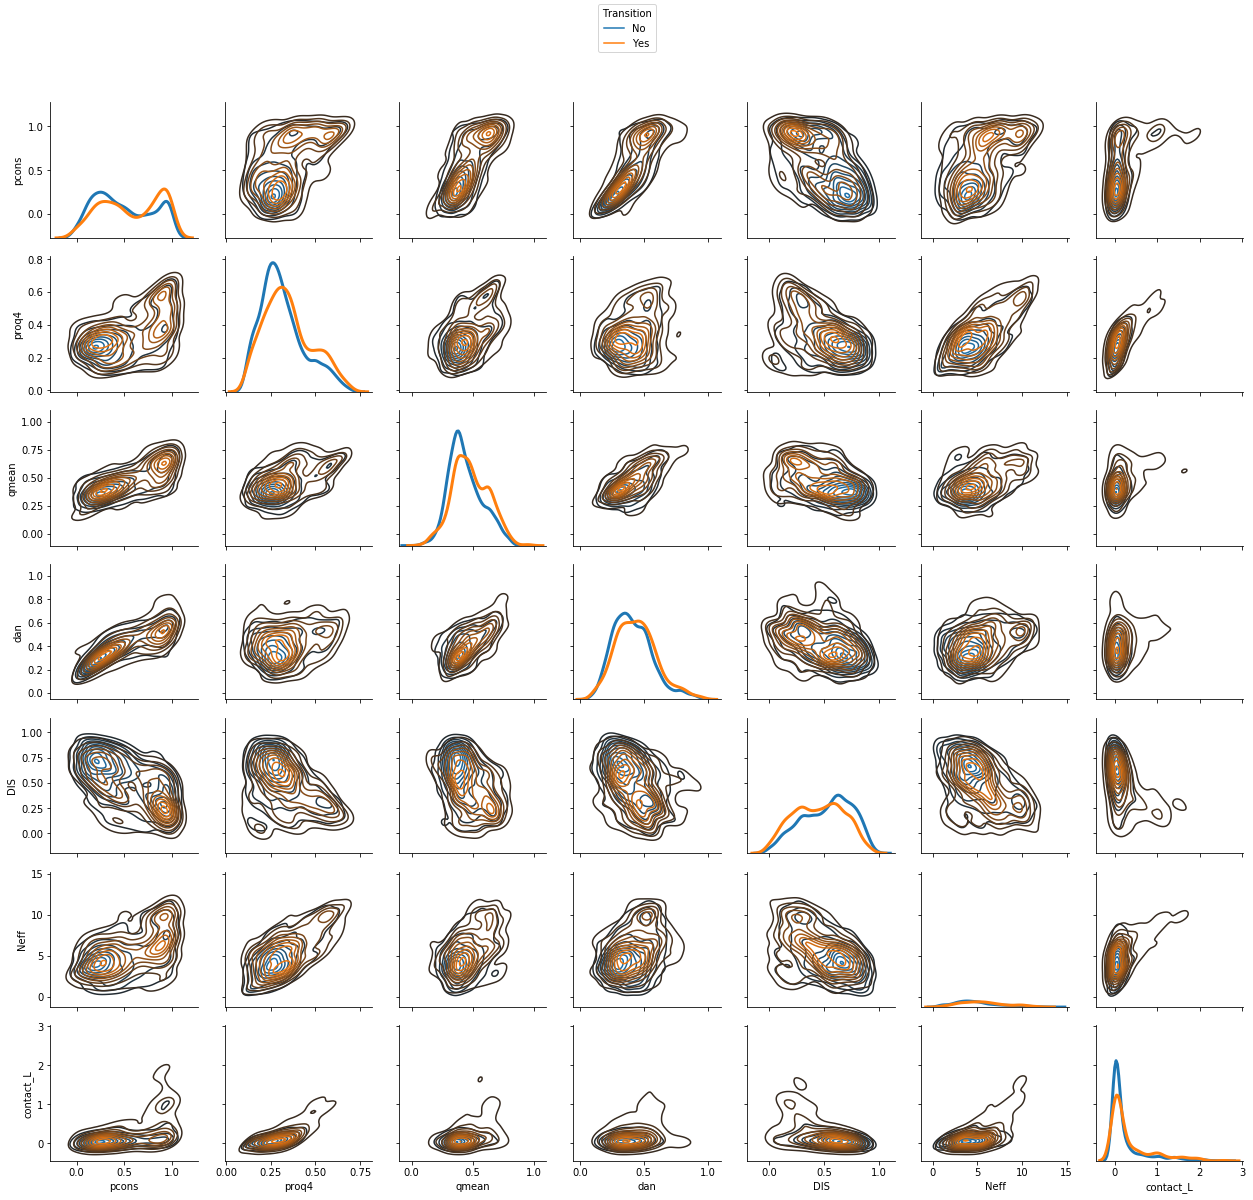

<Figure size 432x288 with 0 Axes>

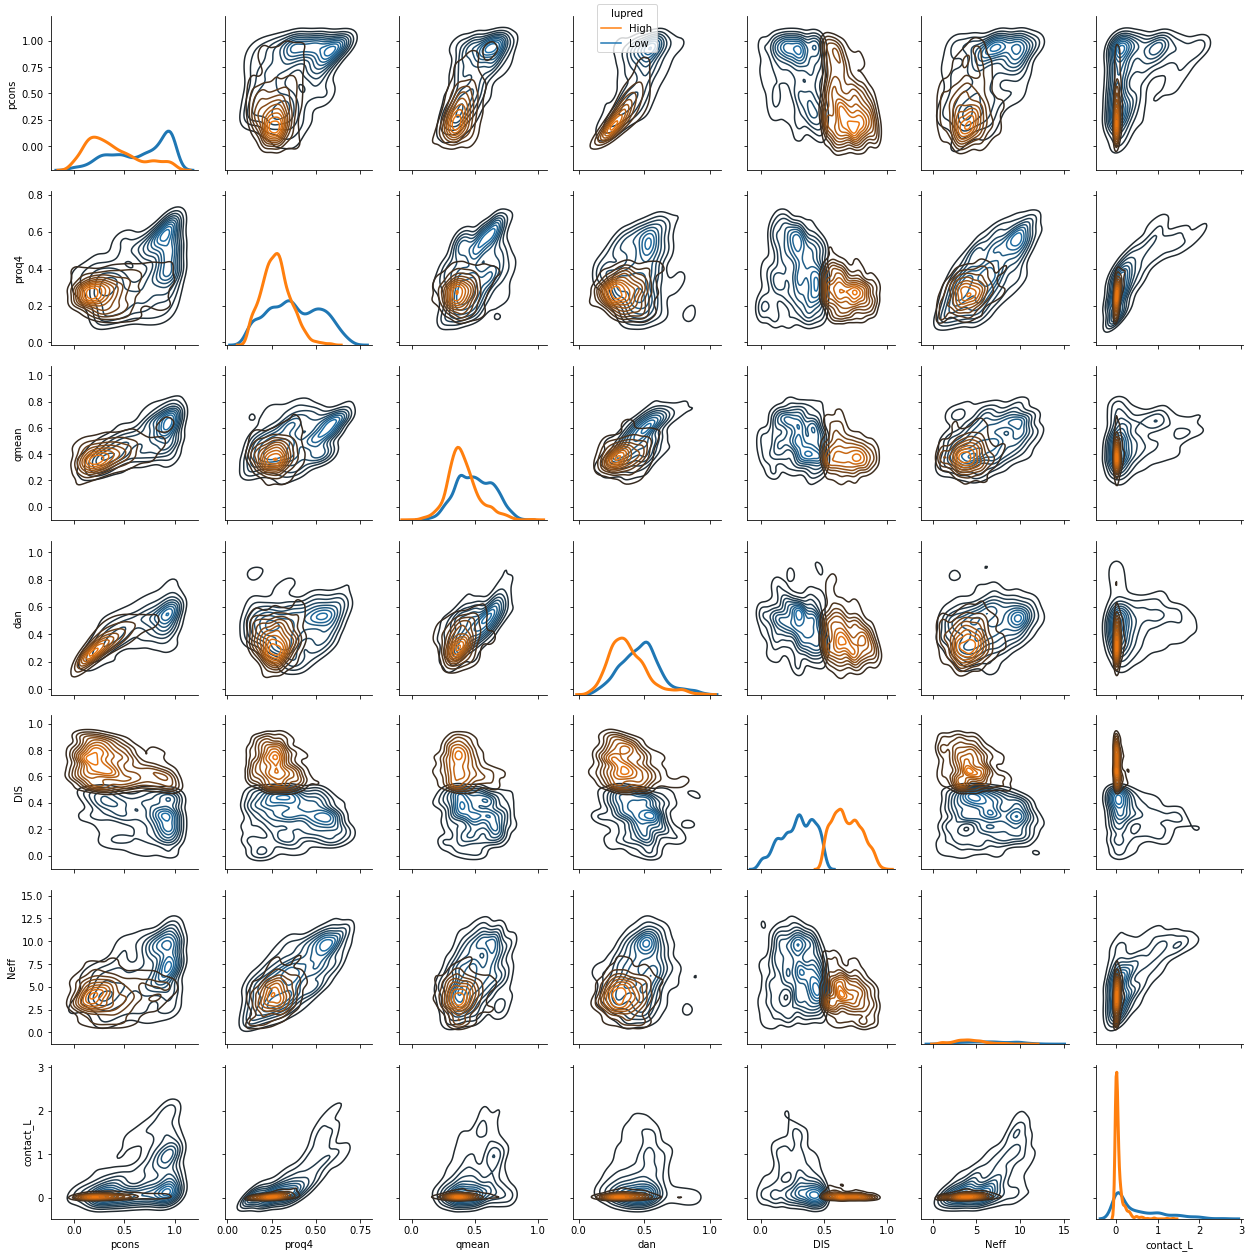

<Figure size 432x288 with 0 Axes>

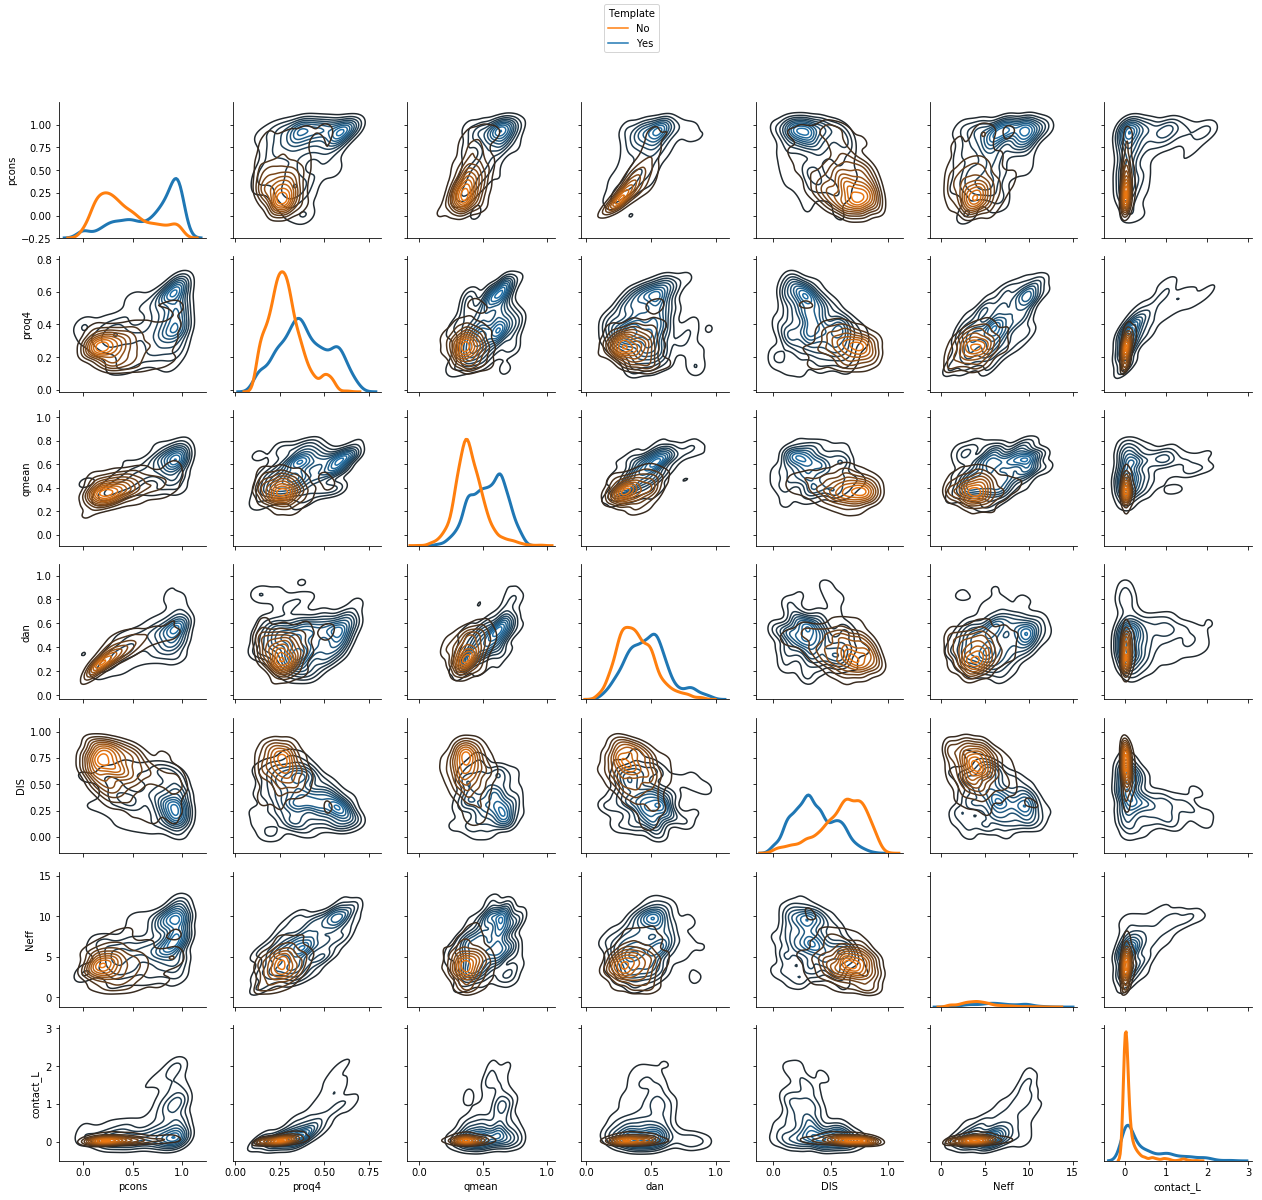

In [2]:
TMscore_below_50s  = TMscore_below_50[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
TMscore_above_50s= TMscore_above_50[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
TR_below_50s = TR_below_50[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
TR_above_50s = TR_above_50[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
dfP2s = dfP2[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
dfPTs = dfPT[['pcons', 'proq4', 'qmean', 'dan', 'DIS',"Neff","contact_L"]]
TMscore_below_50s['DF'] = 'Template TM<0.5'
TMscore_above_50s['DF'] = 'Template TM>0.5'
TR_below_50s['DF'] = 'Transition template TM<0.5'
TR_above_50s['DF'] = 'Transition template TM>0.5'
dfP2s['DF'] = 'NO template'
dfPTs['DF'] = 'Transition NO template'
####Transition########
TMscore_below_50s['Transition'] = 'No'
TMscore_above_50s['Transition'] = 'No'
TR_below_50s['Transition'] = 'Yes'
TR_above_50s['Transition'] = 'Yes'
dfP2s['Transition'] = 'No'
dfPTs['Transition'] = 'Yes'

####Template########
TMscore_below_50s['Template'] = 'Yes'
TMscore_above_50s['Template'] = 'Yes'
TR_below_50s['Template'] = 'Yes'
TR_above_50s['Template'] = 'Yes'
dfP2s['Template'] = 'No'
dfPTs['Template'] = 'No'


####Iupred########
TMscore_below_50s['Transition'] = 'No'
TMscore_above_50s['Transition'] = 'No'
TR_below_50s['Transition'] = 'Yes'
TR_above_50s['Transition'] = 'Yes'
dfP2s['Transition'] = 'No'
dfPTs['Transition'] = 'Yes'


df_final = pd.concat([TMscore_below_50s,TMscore_above_50s,TR_below_50s,TR_above_50s,dfP2s,dfPTs], ignore_index=True)


print(df_final.corr(method='pearson'))

df_final.loc[df_final['DIS'] >= 0.5, 'Iupred'] = 'High'
df_final.loc[df_final['DIS'] < 0.5, 'Iupred'] = 'Low'
#print(df_final)



plt.figure()
#ax = sns.pairplot(df_final, hue="Transition")
ax = sns.PairGrid(df_final, hue="Transition")
ax = ax.map_diag(sns.kdeplot, lw=3)
ax = ax.map_offdiag(sns.kdeplot, lw=1)
handles = ax._legend_data.values()
labels = ax._legend_data.keys()
ax.fig.legend(title='Transition',handles=handles, labels=labels, loc='upper center', ncol=1)
ax.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.savefig('Transiton_plot.png', dpi=300, bbox_inches='tight')

plt.figure()
#ay = sns.pairplot(df_final, hue="Iupred")
ay = sns.PairGrid(df_final, hue="Iupred")
ay = ay.map_diag(sns.kdeplot, lw=3)
ay = ay.map_offdiag(sns.kdeplot, lw=1)
handles = ay._legend_data.values()
labels = ay._legend_data.keys()
ay.fig.legend(title='Iupred', handles=handles, labels=labels, loc='upper center', ncol=1)
plt.savefig('Iupred_plot.png', dpi=300, bbox_inches='tight')

plt.figure()
#az = sns.pairplot(df_final, hue="Template")
az = sns.PairGrid(df_final, hue="Template")
az = az.map_diag(sns.kdeplot, lw=3)
az = az.map_offdiag(sns.kdeplot, lw=1)
handles = az._legend_data.values()
labels = az._legend_data.keys()
az.fig.legend(title='Template', handles=handles, labels=labels, loc='upper center', ncol=1)

az.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.savefig('Template_plot.png', dpi=300, bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

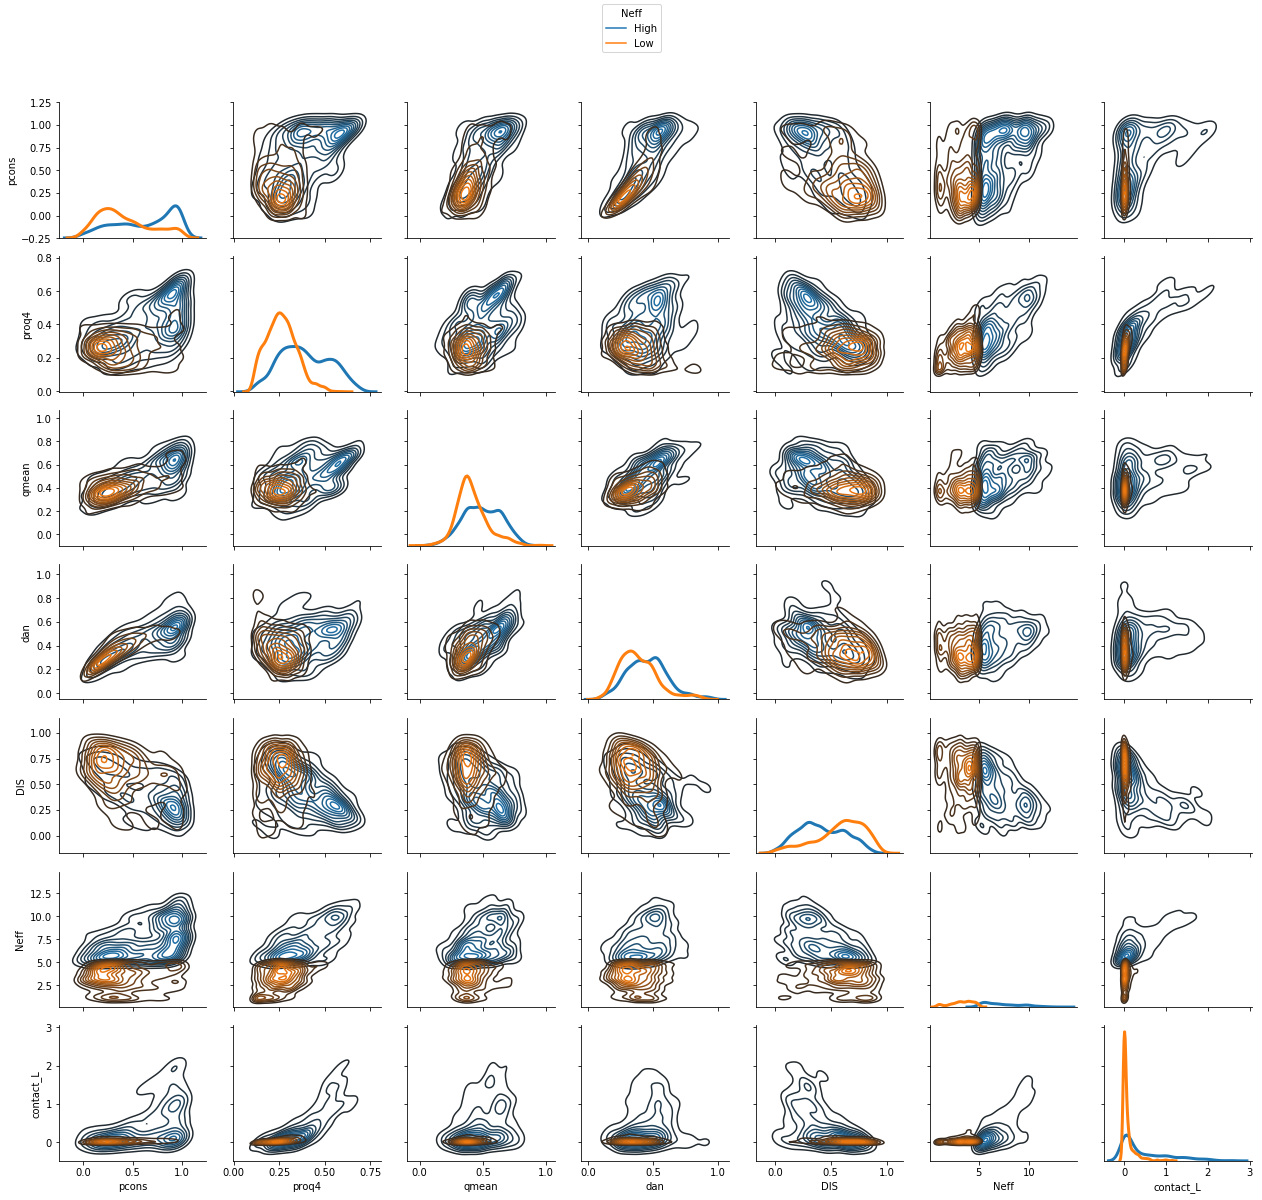

In [3]:
df_final.loc[df_final['Neff'] >= 5, 'Neff_rate'] = 'High'
df_final.loc[df_final['Neff'] < 5, 'Neff_rate'] = 'Low'
#print(df_final)
plt.figure()
ax = sns.PairGrid(df_final, hue="Neff_rate")
ax = ax.map_diag(sns.kdeplot, lw=3)
ax = ax.map_offdiag(sns.kdeplot, lw=1)
handles = ax._legend_data.values()
labels = ax._legend_data.keys()
ax.fig.legend(title='Neff',handles=handles, labels=labels, loc='upper center', ncol=1)
ax.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.savefig('Neff_plot.png', dpi=300, bbox_inches='tight')

In [6]:
df_small = TMscore_above_50[['DIS',"Neff"]]
print(df_small)

           DIS      Neff
15    0.132633   7.06948
16    0.132633   7.06948
105   0.314034   6.06682
106   0.314034   6.06682
107   0.314034   6.06682
108   0.314034   6.06682
140   0.299118   9.78270
141   0.299118   9.78270
142   0.299118   9.78270
143   0.299118   9.78270
170   0.207306   6.01028
425   0.116081   5.22622
470   0.602191   5.36678
471   0.602191   5.36678
472   0.602191   5.36678
600   0.617877   4.87180
601   0.617877   4.87180
730   0.417428   9.60428
731   0.417428   9.60428
732   0.417428   9.60428
733   0.417428   9.60428
734   0.417428   9.60428
735   0.502447  10.07200
736   0.502447  10.07200
737   0.502447  10.07200
738   0.502447  10.07200
739   0.502447  10.07200
740   0.462876   5.98969
741   0.462876   5.98969
742   0.462876   5.98969
...        ...       ...
1112  0.307548   3.78784
1113  0.307548   3.78784
1114  0.307548   3.78784
1115  0.492624   5.13162
1116  0.492624   5.13162
1117  0.492624   5.13162
1118  0.492624   5.13162
1119  0.492624   5.13162
